In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import tensorflow as tf
import elvet
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd

Metal device set to: Apple M1
 Elvet: If you use Elvet in research, please cite arXix:2103.14575


In [2]:
Jf_data = np.loadtxt("JF_table.txt", dtype=float)
Jf_data = Jf_data[(-100 <= Jf_data[:,0]) & (Jf_data[:,0] <= 100)]

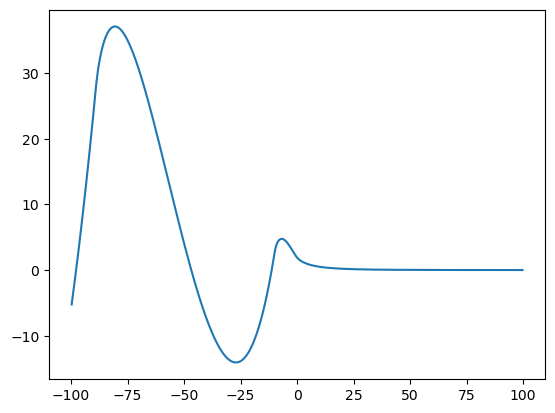

In [3]:
plt.plot(Jf_data[:,0], Jf_data[:,1])
plt.show()

In [4]:
domain = elvet.box((-100, 100, 4001)) 

model = elvet.nn(1, 50, 50, 50, 1)

In [5]:
Jf_interpol = interpolate.splrep(Jf_data[:,0], Jf_data[:,1], k=3, s=0)
y_Jf = lambda x : tf.cast(interpolate.splev(x.numpy(), Jf_interpol, der=0), domain.dtype)

In [6]:
fitter_Jf = elvet.fitter(domain, y_Jf(domain), model=model, epochs=50000, lr=0.001)

 Elvet: Setting optimizer parameter 'lr' to 0.001
 Elvet: epoch = 1, loss = 1.83e+02, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 1.43e+01, elapsed time = 00:00:50
 Elvet: epoch = 20000, loss = 5.83e+00, elapsed time = 00:01:40
 Elvet: epoch = 30000, loss = 1.63e+00, elapsed time = 00:02:29
 Elvet: epoch = 40000, loss = 1.87e-01, elapsed time = 00:03:20
 Elvet: epoch = 50000, loss = 1.71e-03, elapsed time = 00:04:10


In [7]:
y_Jf = lambda x : tf.cast(interpolate.splev(x, Jf_interpol, der=0), domain.dtype)

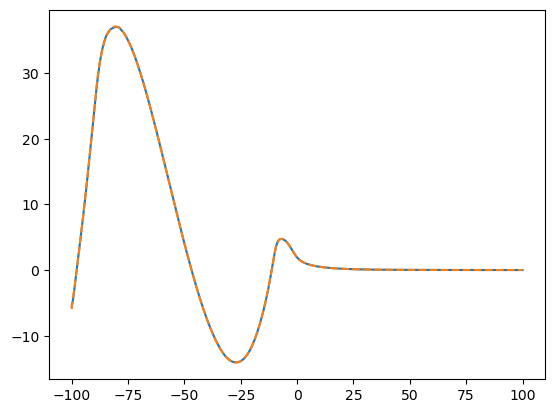

In [8]:
x = np.linspace(-100,100,4001)
plt.plot(x, fitter_Jf.model(x))
plt.plot(x, y_Jf(x), linestyle="dashed")
plt.show()

In [9]:
fitter_Jf.model.save("Jf_model")